# KNN To Categorize Telecommunication Company Customer Base 

Companies often analyze their customer base behaviours with the view of customizing their offers and services to each customer depending on their trends. Using data from a telecommunication campany we will build a model to classify customers into four different categories:
   + 1 - Basic Service
   + 2 - E-Service
   + 3 - Plus Service
   + 4 - Total Service

<p>The numbers 1,2,3,4 match the values in our target column and can be mapped to the category names as shown above.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
cust_df = pd.read_csv('teleCust.csv')
cust_df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## EDA

In [3]:
cust_df.shape

(1000, 12)

In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


All columns are of numerical type meaning we can feed the features into a model without having to encode them.

In [5]:
cust_df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


<p style='padding-top:25px'>We then check for any missing and duplicate values</p>

In [6]:
cust_df.duplicated().sum()

0

In [7]:
cust_df.isna().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

The dataset does not contain any duplicated or missing values

#### Let us check and visualize the correlation of the dataset

In [8]:
corr = cust_df.corr()

In [9]:
corr['custcat'].sort_values(ascending=False)

custcat    1.000000
ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
retire     0.008908
gender    -0.004966
region    -0.023771
Name: custcat, dtype: float64

<Axes: >

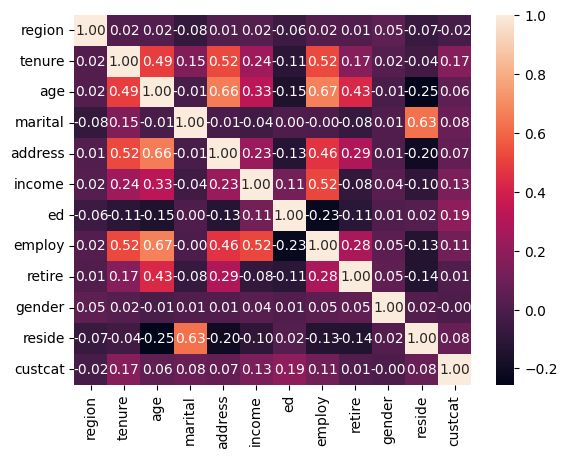

In [10]:
sns.heatmap(corr, annot=True, fmt='.2f')

The correlation between our target column, <b>custcat</b> and the rest of the features is mostly positive except for the <b>gender and <b>region</b> columns. However in both the negative and positive cases the correlation is weak.

## Data manipulation

#### Check for any outliers in the dataset

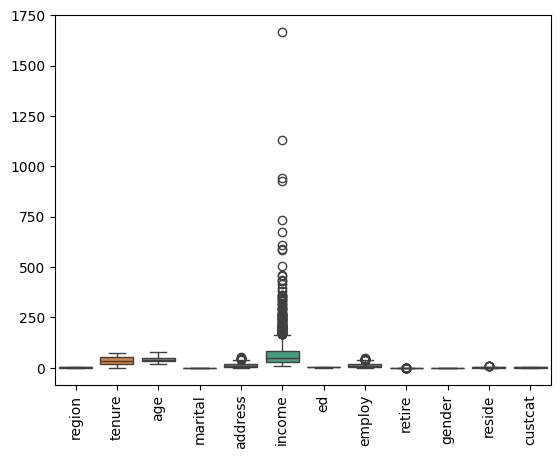

In [11]:
sns.boxplot(cust_df)
plt.xticks(rotation=90)
plt.show()

The income column appears to have majority of the outliers

In [12]:
from scipy.stats.mstats import winsorize

In [13]:
for column in cust_df.columns:
    if column != 'custcat':
        cust_df[column] = winsorize(cust_df[column], limits=[0.15,0.15])

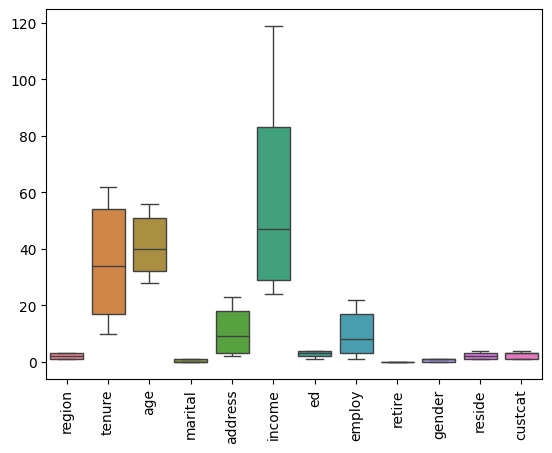

In [14]:
sns.boxplot(cust_df)
plt.xticks(rotation=90)
plt.show()

#### Define independent and dependent features

In [15]:
# define independent features X
X = cust_df.drop(['custcat','retire','gender'], axis=1)
X

,region,tenure,age,marital,address,income,ed,employ,reside
0,2,13,44,1,9,64.0,4,5,2
1,3,11,33,1,7,119.0,4,5,4
2,3,62,52,1,23,116.0,1,22,2
3,2,33,33,0,12,33.0,2,1,1
4,2,23,30,1,9,30.0,1,2,4
...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,2,27.0,3,1,3
996,1,10,34,0,2,24.0,4,5,1
997,3,62,56,0,23,119.0,4,22,1
998,3,62,49,0,18,87.0,2,22,1


In [16]:
# define dependent/target feature y
y = cust_df['custcat']
y

0      1
1      4
2      3
3      1
4      3
      ..
995    1
996    1
997    4
998    3
999    2
Name: custcat, Length: 1000, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

#### Scale the features

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# using default parameter values
knn = KNeighborsClassifier()

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_predict = knn.predict(X_test)
y_predict

array([3, 2, 2, 1, 4, 4, 4, 4, 1, 1, 2, 4, 3, 1, 1, 3, 3, 1, 4, 2, 2, 3,
       1, 4, 2, 4, 2, 4, 3, 3, 2, 1, 2, 4, 2, 1, 1, 1, 1, 4, 2, 3, 3, 2,
       1, 3, 1, 1, 3, 2, 1, 3, 1, 2, 3, 3, 1, 3, 2, 4, 1, 3, 1, 3, 1, 2,
       2, 4, 3, 1, 2, 1, 3, 4, 3, 1, 1, 1, 2, 2, 2, 1, 1, 3, 2, 1, 4, 3,
       1, 3, 1, 2, 1, 1, 1, 2, 1, 2, 1, 3, 3, 2, 4, 1, 1, 1, 3, 2, 1, 3,
       1, 2, 3, 1, 3, 2, 1, 1, 3, 2, 1, 1, 4, 1, 1, 4, 4, 1, 4, 4, 2, 1,
       2, 3, 2, 4, 2, 1, 3, 1, 4, 1, 4, 1, 2, 2, 1, 3, 1, 2, 1, 2, 1, 3,
       1, 3, 1, 3, 4, 2, 4, 1, 3, 3, 1, 1, 3, 3, 1, 1, 2, 3, 4, 4, 3, 1,
       4, 4, 2, 2, 1, 3, 3, 3, 4, 2, 3, 1, 2, 1, 2, 2, 3, 3, 1, 1, 1, 2,
       3, 1])

## Metrics

In [25]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

In [26]:
print(f'accuracy: {accuracy_score(y_test, y_predict)*100}%')
print(f'precision: {precision_score(y_test, y_predict, average="weighted")*100:.2f}%')

accuracy: 31.5%
precision: 31.19%


In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.36      0.49      0.41        53
           2       0.28      0.29      0.28        45
           3       0.29      0.28      0.28        50
           4       0.32      0.19      0.24        52

    accuracy                           0.32       200
   macro avg       0.31      0.31      0.30       200
weighted avg       0.31      0.32      0.31       200



#### confusion matrix

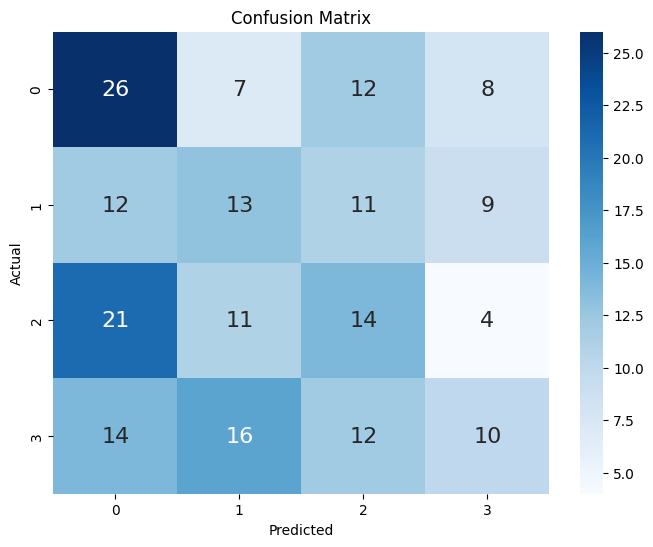

In [28]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Visualize the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model perform poorly and could be improved using several methods including hyperparameter tuning. In this case we are going to try to tune the number of n_neighbors and check the effect it has on the model. To do this we are going to use the Grid Search method to find the best possible value of n_neighbours.  

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

# Get the best parameter
best_k = grid_search.best_params_['n_neighbors']
best_k

13

We can then rebuild the model using <b>n_neighbours=13</b> 

In [31]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
y_predict

array([3, 2, 4, 1, 4, 4, 4, 4, 4, 1, 2, 4, 3, 3, 3, 3, 3, 1, 1, 1, 2, 3,
       1, 1, 4, 1, 3, 4, 4, 3, 2, 1, 2, 4, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2,
       1, 3, 1, 1, 3, 4, 3, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 3, 3, 3, 1, 4,
       3, 3, 3, 1, 2, 1, 3, 4, 2, 1, 1, 1, 2, 2, 4, 1, 4, 3, 2, 3, 4, 3,
       1, 3, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 2, 4, 3,
       1, 2, 1, 1, 3, 1, 1, 4, 1, 2, 1, 1, 4, 1, 4, 4, 4, 3, 4, 2, 1, 1,
       1, 3, 2, 4, 2, 1, 3, 1, 4, 1, 4, 1, 2, 1, 1, 3, 1, 3, 1, 4, 1, 3,
       1, 3, 1, 4, 4, 3, 4, 1, 1, 3, 3, 1, 3, 3, 1, 3, 2, 3, 3, 1, 1, 1,
       4, 3, 1, 4, 3, 3, 3, 1, 4, 3, 3, 1, 3, 1, 2, 2, 3, 3, 1, 1, 1, 2,
       3, 1])

In [32]:
print(f'accuracy: {accuracy_score(y_test, y_predict)*100}%')
print(f'precision: {precision_score(y_test, y_predict, average="weighted")*100:.2f}%')

accuracy: 41.5%
precision: 42.57%


The model accuracy increases by about 10%. This is still not optimal but it goes to show how hyperparameter tuning can be used to improve the quality of the model. Further strategies can be employed to get the model accuracy and precision to above 